<a href="https://colab.research.google.com/github/marcelobgs/DataTwitterEleitoral/blob/main/Etapa_4_AnaliseDeSentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.3 MB/s 


In [2]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
dataframe_sentimento = pd.read_csv("dataframe_final_candidatos_pronto_para_sentimento.csv")

In [4]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo
0,2022-07-30 00:27:15+00:00,1553175352494678016,É LULA PRESIDENTE!!\nBóra subir👆 https://t.co/...,Lula,é lula presidente!!bóra subir👆
1,2022-07-30 00:27:15+00:00,1553175351362306049,@taoquei1 @AndreJanonesAdv @LulaOficial falou ...,Lula,"falou a bolsonarista de costumes, aonde de ..."
2,2022-07-30 00:27:13+00:00,1553175343158202368,@PrjorgeS @Nilsonhandebol @TANIAMARIAMBAR1 @br...,Lula,para conseguir meus seguidores e...
3,2022-07-30 00:27:12+00:00,1553175342701060101,@galo__vasco @LulaOficial Dá o cool pra ele!,Lula,dá o cool pra ele!
4,2022-07-30 00:27:12+00:00,1553175342394793985,@RoLuchsinger Se @uniaobrasil44 apoiar @LulaOf...,Lula,se apoiar o então ex juiz e ex ministro do ...


In [5]:
analisador_de_texto = SentimentIntensityAnalyzer()

In [6]:
dataframe_sentimento['Sentimento'] = dataframe_sentimento['Tweet_limpo'].apply(lambda i: analisador_de_texto.polarity_scores(' '.join(re.findall(r'\w', i.lower()))))

In [7]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento
0,2022-07-30 00:27:15+00:00,1553175352494678016,É LULA PRESIDENTE!!\nBóra subir👆 https://t.co/...,Lula,é lula presidente!!bóra subir👆,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp..."
1,2022-07-30 00:27:15+00:00,1553175351362306049,@taoquei1 @AndreJanonesAdv @LulaOficial falou ...,Lula,"falou a bolsonarista de costumes, aonde de ...","{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou..."
2,2022-07-30 00:27:13+00:00,1553175343158202368,@PrjorgeS @Nilsonhandebol @TANIAMARIAMBAR1 @br...,Lula,para conseguir meus seguidores e...,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou..."
3,2022-07-30 00:27:12+00:00,1553175342701060101,@galo__vasco @LulaOficial Dá o cool pra ele!,Lula,dá o cool pra ele!,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp..."
4,2022-07-30 00:27:12+00:00,1553175342394793985,@RoLuchsinger Se @uniaobrasil44 apoiar @LulaOf...,Lula,se apoiar o então ex juiz e ex ministro do ...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp..."


In [8]:
dataframe_sentimento['Sentimento']

0      {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...
1      {'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou...
2      {'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...
3      {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...
4      {'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...
                             ...                        
148    {'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'comp...
149    {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...
150    {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...
151    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
152    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimento, Length: 153, dtype: object

In [9]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['pos'])

In [10]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo
0,2022-07-30 00:27:15+00:00,1553175352494678016,É LULA PRESIDENTE!!\nBóra subir👆 https://t.co/...,Lula,é lula presidente!!bóra subir👆,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.214
1,2022-07-30 00:27:15+00:00,1553175351362306049,@taoquei1 @AndreJanonesAdv @LulaOficial falou ...,Lula,"falou a bolsonarista de costumes, aonde de ...","{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou...",0.090
2,2022-07-30 00:27:13+00:00,1553175343158202368,@PrjorgeS @Nilsonhandebol @TANIAMARIAMBAR1 @br...,Lula,para conseguir meus seguidores e...,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",0.070
3,2022-07-30 00:27:12+00:00,1553175342701060101,@galo__vasco @LulaOficial Dá o cool pra ele!,Lula,dá o cool pra ele!,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.353
4,2022-07-30 00:27:12+00:00,1553175342394793985,@RoLuchsinger Se @uniaobrasil44 apoiar @LulaOf...,Lula,se apoiar o então ex juiz e ex ministro do ...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.129


In [11]:
dataframe_sentimento['Negativo'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['neg'])

In [12]:
dataframe_sentimento['Neutro'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['neu'])

In [13]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['pos'])

In [14]:
dataframe_sentimento['Composicao'] = dataframe_sentimento['Sentimento'].apply(lambda i:i['compound'])

In [15]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao
0,2022-07-30 00:27:15+00:00,1553175352494678016,É LULA PRESIDENTE!!\nBóra subir👆 https://t.co/...,Lula,é lula presidente!!bóra subir👆,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.214,0.0,0.786,0.7184
1,2022-07-30 00:27:15+00:00,1553175351362306049,@taoquei1 @AndreJanonesAdv @LulaOficial falou ...,Lula,"falou a bolsonarista de costumes, aonde de ...","{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou...",0.090,0.0,0.910,0.8402
2,2022-07-30 00:27:13+00:00,1553175343158202368,@PrjorgeS @Nilsonhandebol @TANIAMARIAMBAR1 @br...,Lula,para conseguir meus seguidores e...,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",0.070,0.0,0.930,0.8402
3,2022-07-30 00:27:12+00:00,1553175342701060101,@galo__vasco @LulaOficial Dá o cool pra ele!,Lula,dá o cool pra ele!,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.353,0.0,0.647,0.7184
4,2022-07-30 00:27:12+00:00,1553175342394793985,@RoLuchsinger Se @uniaobrasil44 apoiar @LulaOf...,Lula,se apoiar o então ex juiz e ex ministro do ...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.129,0.0,0.871,0.9001


In [16]:
sentimento = []

In [17]:
for i in dataframe_sentimento['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <=(-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')

In [18]:
sentimento

['Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Neutro',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Positivo',
 'Positivo',
 'Neutro',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Positivo',
 'Positivo',
 'Neutro',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Positivo',
 'Positivo',
 'Neutro',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Positivo',
 'Neutro',
 'Positivo',
 'Positivo',
 

In [19]:
dataframe_sentimento['Sentimento_Final'] = sentimento

In [20]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-30 00:27:15+00:00,1553175352494678016,É LULA PRESIDENTE!!\nBóra subir👆 https://t.co/...,Lula,é lula presidente!!bóra subir👆,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.214,0.0,0.786,0.7184,Positivo
1,2022-07-30 00:27:15+00:00,1553175351362306049,@taoquei1 @AndreJanonesAdv @LulaOficial falou ...,Lula,"falou a bolsonarista de costumes, aonde de ...","{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou...",0.090,0.0,0.910,0.8402,Positivo
2,2022-07-30 00:27:13+00:00,1553175343158202368,@PrjorgeS @Nilsonhandebol @TANIAMARIAMBAR1 @br...,Lula,para conseguir meus seguidores e...,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",0.070,0.0,0.930,0.8402,Positivo
3,2022-07-30 00:27:12+00:00,1553175342701060101,@galo__vasco @LulaOficial Dá o cool pra ele!,Lula,dá o cool pra ele!,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.353,0.0,0.647,0.7184,Positivo
4,2022-07-30 00:27:12+00:00,1553175342394793985,@RoLuchsinger Se @uniaobrasil44 apoiar @LulaOf...,Lula,se apoiar o então ex juiz e ex ministro do ...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.129,0.0,0.871,0.9001,Positivo


In [21]:
dataframe_sentimento['Sentimento_Final'].value_counts()

Positivo    118
Neutro       35
Name: Sentimento_Final, dtype: int64

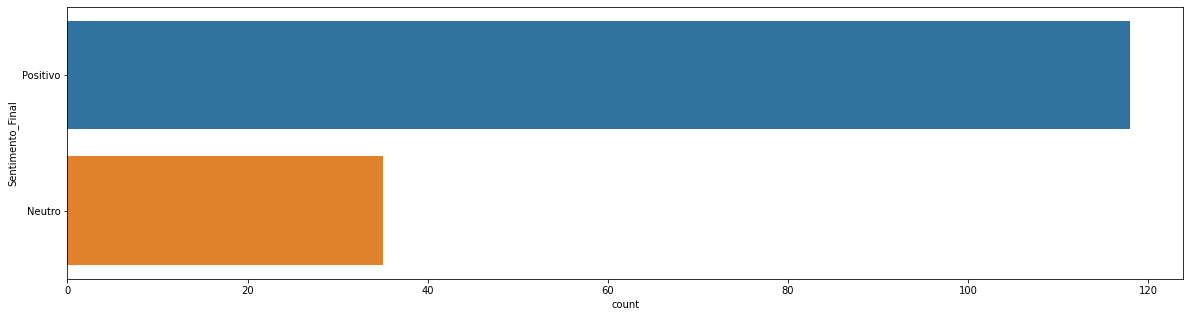

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sentimento_Final", data = dataframe_sentimento)

In [23]:
resultado_filtro_lula = dataframe_sentimento[dataframe_sentimento['Candidato']=='Lula']

In [24]:
resultado_filtro_lula.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-30 00:27:15+00:00,1553175352494678016,É LULA PRESIDENTE!!\nBóra subir👆 https://t.co/...,Lula,é lula presidente!!bóra subir👆,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.214,0.0,0.786,0.7184,Positivo
1,2022-07-30 00:27:15+00:00,1553175351362306049,@taoquei1 @AndreJanonesAdv @LulaOficial falou ...,Lula,"falou a bolsonarista de costumes, aonde de ...","{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou...",0.090,0.0,0.910,0.8402,Positivo
2,2022-07-30 00:27:13+00:00,1553175343158202368,@PrjorgeS @Nilsonhandebol @TANIAMARIAMBAR1 @br...,Lula,para conseguir meus seguidores e...,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",0.070,0.0,0.930,0.8402,Positivo
3,2022-07-30 00:27:12+00:00,1553175342701060101,@galo__vasco @LulaOficial Dá o cool pra ele!,Lula,dá o cool pra ele!,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.353,0.0,0.647,0.7184,Positivo
4,2022-07-30 00:27:12+00:00,1553175342394793985,@RoLuchsinger Se @uniaobrasil44 apoiar @LulaOf...,Lula,se apoiar o então ex juiz e ex ministro do ...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.129,0.0,0.871,0.9001,Positivo


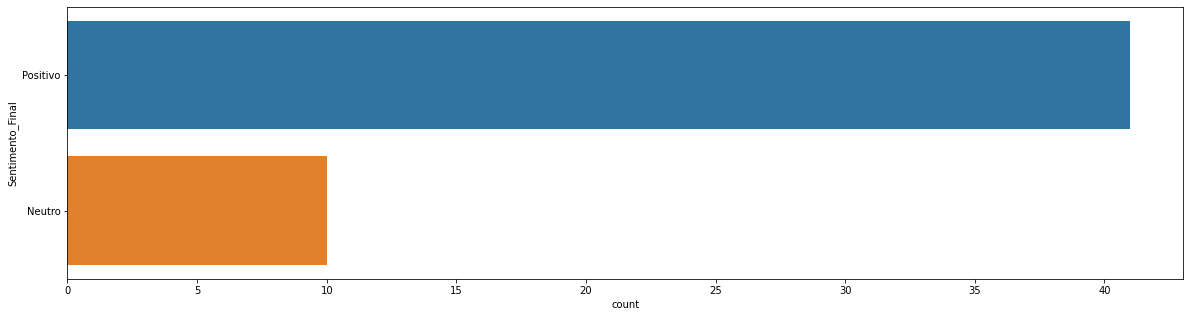

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sentimento_Final", data = resultado_filtro_lula)

In [26]:
resultado_filtro_bolsonaro = dataframe_sentimento[dataframe_sentimento['Candidato']=='Bolsonaro']

In [27]:
resultado_filtro_bolsonaro.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
51,2022-07-30 00:27:31+00:00,1553175419691606017,@marcofeliciano Esse Tweet ajuda bem mais o Lu...,Bolsonaro,esse tweet ajuda bem mais o lula que o bolson...,"{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",0.182,0.0,0.818,0.9517,Positivo
52,2022-07-30 00:27:30+00:00,1553175417779113987,"Donald Trump en EEUU, Nicolás Maduro en Venezu...",Bolsonaro,"donald trump en eeuu, nicolás maduro en venezu...","{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'comp...",0.131,0.0,0.869,0.9818,Positivo
53,2022-07-30 00:27:30+00:00,1553175416826888192,@Titia_do_zap @jairbolsonaro Amém 🙏🏻,Bolsonaro,amém 🙏🏻,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,Neutro
54,2022-07-30 00:27:30+00:00,1553175416768286721,@Tali_Mito22 O que eles não sabem é que não ha...,Bolsonaro,o que eles não sabem é que não haverá 2°turno...,"{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'comp...",0.105,0.0,0.895,0.7184,Positivo
55,2022-07-30 00:27:29+00:00,1553175413278523392,@leandroruschel Pois é....vale tudo p tirar Bo...,Bolsonaro,pois é....vale tudo p tirar bolsonaro....o es...,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...",0.150,0.0,0.850,0.9325,Positivo


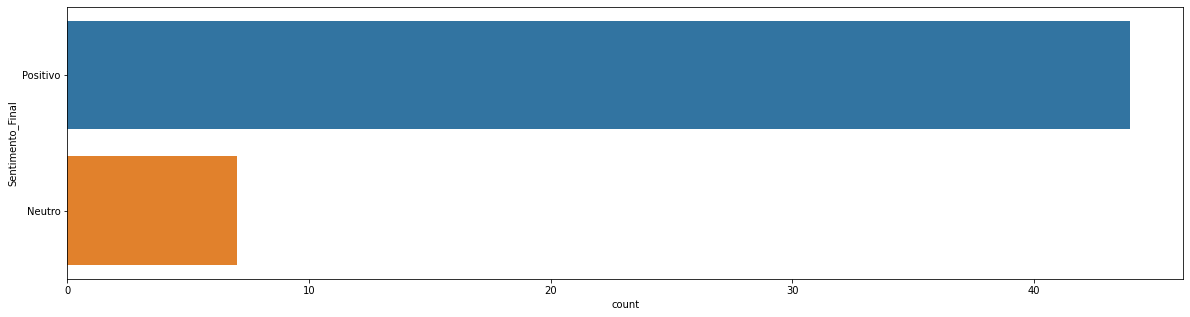

In [28]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sentimento_Final", data = resultado_filtro_bolsonaro)

In [29]:
resultado_filtro_ciro = dataframe_sentimento[dataframe_sentimento['Candidato']=='Ciro Gomes']

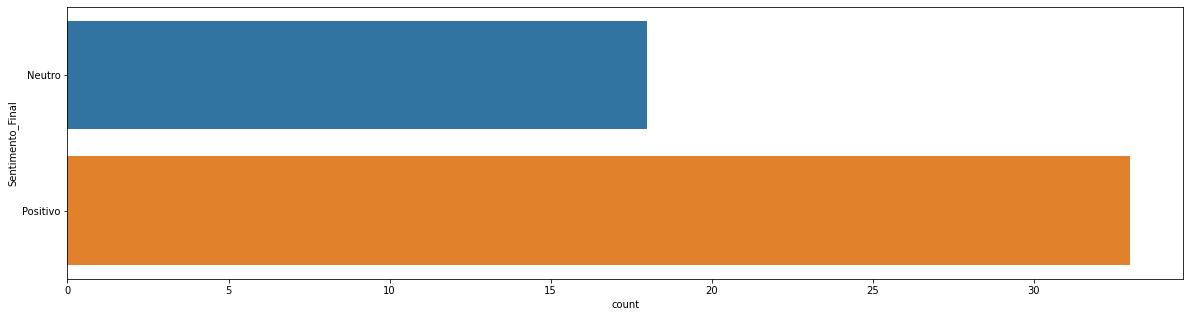

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sentimento_Final", data = resultado_filtro_ciro)

In [31]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-30 00:27:15+00:00,1553175352494678016,É LULA PRESIDENTE!!\nBóra subir👆 https://t.co/...,Lula,é lula presidente!!bóra subir👆,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.214,0.0,0.786,0.7184,Positivo
1,2022-07-30 00:27:15+00:00,1553175351362306049,@taoquei1 @AndreJanonesAdv @LulaOficial falou ...,Lula,"falou a bolsonarista de costumes, aonde de ...","{'neg': 0.0, 'neu': 0.91, 'pos': 0.09, 'compou...",0.090,0.0,0.910,0.8402,Positivo
2,2022-07-30 00:27:13+00:00,1553175343158202368,@PrjorgeS @Nilsonhandebol @TANIAMARIAMBAR1 @br...,Lula,para conseguir meus seguidores e...,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",0.070,0.0,0.930,0.8402,Positivo
3,2022-07-30 00:27:12+00:00,1553175342701060101,@galo__vasco @LulaOficial Dá o cool pra ele!,Lula,dá o cool pra ele!,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.353,0.0,0.647,0.7184,Positivo
4,2022-07-30 00:27:12+00:00,1553175342394793985,@RoLuchsinger Se @uniaobrasil44 apoiar @LulaOf...,Lula,se apoiar o então ex juiz e ex ministro do ...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.129,0.0,0.871,0.9001,Positivo


In [32]:
dataframe_final = dataframe_sentimento[['Data_Hora', 'IdTweet','Tweet', 'Candidato', 'Tweet_limpo', 'Sentimento_Final']]

In [33]:
dataframe_final.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento_Final
0,2022-07-30 00:27:15+00:00,1553175352494678016,É LULA PRESIDENTE!!\nBóra subir👆 https://t.co/...,Lula,é lula presidente!!bóra subir👆,Positivo
1,2022-07-30 00:27:15+00:00,1553175351362306049,@taoquei1 @AndreJanonesAdv @LulaOficial falou ...,Lula,"falou a bolsonarista de costumes, aonde de ...",Positivo
2,2022-07-30 00:27:13+00:00,1553175343158202368,@PrjorgeS @Nilsonhandebol @TANIAMARIAMBAR1 @br...,Lula,para conseguir meus seguidores e...,Positivo
3,2022-07-30 00:27:12+00:00,1553175342701060101,@galo__vasco @LulaOficial Dá o cool pra ele!,Lula,dá o cool pra ele!,Positivo
4,2022-07-30 00:27:12+00:00,1553175342394793985,@RoLuchsinger Se @uniaobrasil44 apoiar @LulaOf...,Lula,se apoiar o então ex juiz e ex ministro do ...,Positivo


In [34]:
dataframe_final.to_csv('dataframe_final.csv', sep=',', index=False)